# To Mail or Not Mail Prediction
We are a medium Insurance Firm and one of  our critical function is targeting prospective clients and customer with the aim of informing them about our various products and services. The conduit for conveying the information to prospective customers is primarily by e-mails. From our preliminary investigation we observed that quite a couple of people do not open the mails and those that bother to open the direct marketing e-mail they often go ahead and unsubscribe altogether.

As a responsible corporate organization we hold our customers in high esteem and would avoid any behaviour/attitude that may portray us in bad light before customers especially prospective customers. To this end we would want to apply machine learning to solve this problem of sending direct marketing e-mails to prospective clients/customers that are interested in our products and services and who have the capacity to transition from prospective customers to loyal customers/buyers.
We would build a supervised model that would be base on historical data of customer behaviour and reaction to our periodic direct email marketing campaigns 

## Formal Problem Statement
We want to predict which customer should be sent the direct marketing emails and those that should not be sent the direct marketing e-mail. In other words, rather than guess and risk the chance of tormenting customers with unwanted mails that would end up as 'spam mails', we would invest time and efforts into creating a machine learning model that can predict the most likely customer that would not only read our  direct marketing emails but has the capacity/ interest in purchasing our products and services. According to our data the ground truth is under the variable of where or not a customer has a caravan insurance policy(V86)



## Data Dictionary

In [1]:
import os
os.chdir('/Users/ajakaiye/Documents/data')

In [2]:
print(open('data_dictionary.txt',encoding= 'ISO-8859-1').read())


DATADICTIONARY

Nr Name Description Domain

1 MOSTYPE Customer Subtype see L0

2 MAANTHUI Number of houses 1  10

3 MGEMOMV Avg size household 1  6

4 MGEMLEEF Avg age see L1

5 MOSHOOFD Customer main type see L2

6 MGODRK Roman catholic see L3

7 MGODPR Protestant ...

8 MGODOV Other religion

9 MGODGE No religion

10 MRELGE Married

11 MRELSA Living together

12 MRELOV Other relation

13 MFALLEEN Singles

14 MFGEKIND Household without children

15 MFWEKIND Household with children

16 MOPLHOOG High level education

17 MOPLMIDD Medium level education

18 MOPLLAAG Lower level education

19 MBERHOOG High status

20 MBERZELF Entrepreneur

21 MBERBOER Farmer

22 MBERMIDD Middle management

23 MBERARBG Skilled labourers

24 MBERARBO Unskilled labourers

25 MSKA Social class A

26 MSKB1 Social class B1

27 MSKB2 Social class B2

28 MSKC Social class C

29 MSKD Social class D

30 MHHUUR Rented house

31 MHKOOP Home owners

32 MAUT1 1 car

33 MAUT2 2 cars

34 MAUT0 No car

35 MZFONDS Nation

## Load Libraries and Package

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from yellowbrick.classifier import ClassPredictionError, DiscriminationThreshold, ClassBalance, ROCAUC,ClassificationReport
import xgboost
%matplotlib inline

In [4]:
pd.set_option('display.max_columns', 100)
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size':22})

## Load Data Set

In [5]:
insur_train = pd.read_csv('carvan_train.csv')
insur_test = pd.read_csv('carvan_test.csv')

In [6]:
insur_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85
0,33,1,4,2,8,0,6,0,3,5,0,4,1,1,8,2,2,6,0,0,1,2,6,1,0,2,1,5,3,1,8,8,1,1,8,1,3,3,3,0,0,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,6,1,3,2,2,0,5,0,4,5,2,2,1,4,5,5,4,0,5,0,0,4,0,0,4,3,0,2,1,3,6,9,0,0,7,2,1,1,5,4,0,6,8,2,0,0,6,0,4,0,0,0,0,0,3,0,0,0,4,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0
2,39,1,3,3,9,1,4,2,3,5,2,3,2,3,6,2,4,4,2,1,1,3,2,2,1,1,5,2,1,1,8,6,2,2,6,3,2,4,3,1,0,3,5,2,0,0,6,0,0,0,0,0,0,0,4,0,0,0,4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,9,1,2,3,3,2,3,2,4,5,4,1,2,4,4,2,4,4,2,1,1,5,1,2,3,1,3,2,2,3,6,7,2,1,7,2,2,5,3,1,0,4,4,2,0,0,5,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,31,1,2,4,7,0,2,0,7,9,0,0,0,6,3,0,0,9,0,0,0,2,4,4,0,0,0,7,2,9,0,7,2,0,9,0,5,4,0,0,0,3,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [7]:
insur_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86
0,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,4,3,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,5,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,0,3,4,2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,0,4,4,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,0,6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [8]:
#from the shape of the data set, we can see that the target variable,V86, is not in the test data set.
#The implication of this is that evaluation of performamce of models would be base on the validation set
#Also the dimensionality is relatively high thus in order for our model not to suffer from course of dimensionality
# we would apply principal component analysis
insur_test.shape, insur_train.shape

((4000, 85), (5822, 86))

In [9]:
# check for missing values
missg_value = insur_train.isnull().sum()
missg_val_test = insur_test.isnull().sum()
print(" Number of missing values in train data is:",missg_value[1])
print(" Number of missing values in test data is:",missg_val_test[1])

 Number of missing values in train data is: 0
 Number of missing values in test data is: 0


In [10]:
#categorical column;need to be treated specially
insur_train['V1']

0       33
1       37
2       37
3        9
4       40
        ..
5817    36
5818    35
5819    33
5820    34
5821    33
Name: V1, Length: 5822, dtype: int64

In [11]:
#Categorical column, needs spcial treatment
insur_train['V5']

0        8
1        8
2        8
3        3
4       10
        ..
5817     8
5818     8
5819     8
5820     8
5821     8
Name: V5, Length: 5822, dtype: int64

### Transform categorical columns
From close observation of the data dictionary,it's apparent that some columns are categorical values but are represented with numbers,these would have to be given the normal treatment accordingly. From our observation V1 and V5 columns represent different categorical values which has to be transform to numerical values.
To ensure uniformity same operation must be carried out in the train and test data set

In [12]:
#get dummies for column V1
v1_dummy = pd.get_dummies(insur_train['V1'], prefix='V1')
insur_train = pd.concat([insur_train, v1_dummy], 1)
insur_train = insur_train.drop(['V1','V1_13'],1)
insur_train.head()



,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,...,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V1_1,V1_2,V1_3,V1_4,V1_5,V1_6,V1_7,V1_8,V1_9,V1_10,V1_11,V1_12,V1_15,V1_16,V1_17,V1_18,V1_19,V1_20,V1_21,V1_22,V1_23,V1_24,V1_25,V1_26,V1_27,V1_28,V1_29,V1_30,V1_31,V1_32,V1_33,V1_34,V1_35,V1_36,V1_37,V1_38,V1_39,V1_40,V1_41
0,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,4,3,0,0,0,6,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,5,4,2,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,0,3,4,2,0,0,6,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,0,4,4,0,0,0,6,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,0,6,3,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [13]:
#get dummies for column V5
v5_dummy = pd.get_dummies(insur_train['V5'],prefix='V5')
insur_train = pd.concat([insur_train,v5_dummy], 1)
insur_train = insur_train.drop(['V5', 'V5_10'], 1)
insur_train.head()


,V2,V3,V4,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,...,V85,V86,V1_1,V1_2,V1_3,V1_4,V1_5,V1_6,V1_7,V1_8,V1_9,V1_10,V1_11,V1_12,V1_15,V1_16,V1_17,V1_18,V1_19,V1_20,V1_21,V1_22,V1_23,V1_24,V1_25,V1_26,V1_27,V1_28,V1_29,V1_30,V1_31,V1_32,V1_33,V1_34,V1_35,V1_36,V1_37,V1_38,V1_39,V1_40,V1_41,V5_1,V5_2,V5_3,V5_4,V5_5,V5_6,V5_7,V5_8,V5_9
0,1,3,2,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,4,3,0,0,0,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,2,2,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,5,4,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,2,2,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,0,3,4,2,0,0,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,0,4,4,0,0,0,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,4,2,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,0,6,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [14]:
#Also transform V1 and V5 to numerical for the test data set
v1_dummy_test = pd.get_dummies(insur_test['V1'],prefix='V1')
insur_test = pd.concat([insur_test, v1_dummy_test], 1)
insur_test = insur_test.drop(['V1','V1_13'], 1)
insur_test.head()

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,...,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V1_1,V1_2,V1_3,V1_4,V1_5,V1_6,V1_7,V1_8,V1_9,V1_10,V1_11,V1_12,V1_15,V1_16,V1_17,V1_18,V1_19,V1_20,V1_21,V1_22,V1_23,V1_24,V1_25,V1_26,V1_27,V1_28,V1_29,V1_30,V1_31,V1_32,V1_33,V1_34,V1_35,V1_36,V1_37,V1_38,V1_39,V1_40,V1_41
0,1,4,2,8,0,6,0,3,5,0,4,1,1,8,2,2,6,0,0,1,2,6,1,0,2,1,5,3,1,8,8,1,1,8,1,3,3,3,0,0,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1,3,2,2,0,5,0,4,5,2,2,1,4,5,5,4,0,5,0,0,4,0,0,4,3,0,2,1,3,6,9,0,0,7,2,1,1,5,4,0,6,8,2,0,0,6,0,4,0,0,...,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,3,3,9,1,4,2,3,5,2,3,2,3,6,2,4,4,2,1,1,3,2,2,1,1,5,2,1,1,8,6,2,2,6,3,2,4,3,1,0,3,5,2,0,0,6,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,2,3,3,2,3,2,4,5,4,1,2,4,4,2,4,4,2,1,1,5,1,2,3,1,3,2,2,3,6,7,2,1,7,2,2,5,3,1,0,4,4,2,0,0,5,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,2,4,7,0,2,0,7,9,0,0,0,6,3,0,0,9,0,0,0,2,4,4,0,0,0,7,2,9,0,7,2,0,9,0,5,4,0,0,0,3,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [15]:
# combine the columns tranformed to numericals with the main test data set and drop the categorical columns
v5_dummy_test = pd.get_dummies(insur_test['V5'], prefix='V5')
insur_test = pd.concat([insur_test, v5_dummy_test], 1)
insur_test = insur_test.drop(['V5','V5_10'], 1)
insur_test.head()

,V2,V3,V4,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,...,V84,V85,V1_1,V1_2,V1_3,V1_4,V1_5,V1_6,V1_7,V1_8,V1_9,V1_10,V1_11,V1_12,V1_15,V1_16,V1_17,V1_18,V1_19,V1_20,V1_21,V1_22,V1_23,V1_24,V1_25,V1_26,V1_27,V1_28,V1_29,V1_30,V1_31,V1_32,V1_33,V1_34,V1_35,V1_36,V1_37,V1_38,V1_39,V1_40,V1_41,V5_1,V5_2,V5_3,V5_4,V5_5,V5_6,V5_7,V5_8,V5_9
0,1,4,2,0,6,0,3,5,0,4,1,1,8,2,2,6,0,0,1,2,6,1,0,2,1,5,3,1,8,8,1,1,8,1,3,3,3,0,0,3,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,3,2,0,5,0,4,5,2,2,1,4,5,5,4,0,5,0,0,4,0,0,4,3,0,2,1,3,6,9,0,0,7,2,1,1,5,4,0,6,8,2,0,0,6,0,4,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,3,3,1,4,2,3,5,2,3,2,3,6,2,4,4,2,1,1,3,2,2,1,1,5,2,1,1,8,6,2,2,6,3,2,4,3,1,0,3,5,2,0,0,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,1,2,3,2,3,2,4,5,4,1,2,4,4,2,4,4,2,1,1,5,1,2,3,1,3,2,2,3,6,7,2,1,7,2,2,5,3,1,0,4,4,2,0,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,2,4,0,2,0,7,9,0,0,0,6,3,0,0,9,0,0,0,2,4,4,0,0,0,7,2,9,0,7,2,0,9,0,5,4,0,0,0,3,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [16]:
#verify shape of test and train data set
insur_test.shape, insur_train.shape

((4000, 131), (5822, 132))

From the above shape, we can see that the dimensions of both data set has increased significantly.Also we can see that the target variable is excluded from the test data set. This simply imply that we may not be able to test the performance of our model until we run our result against the data set with the target variable. However the ready solution is to split our training data into training and validation set while we preserve the test data set exclusively for testing the performance of our model

In [17]:
# check descritive statistics
insur_train.describe().T

,count,mean,std,min,25%,50%,75%,max
V2,5822.0,1.110615,0.405842,1.0,1.0,1.0,1.0,10.0
V3,5822.0,2.678805,0.789835,1.0,2.0,3.0,3.0,5.0
V4,5822.0,2.991240,0.814589,1.0,2.0,3.0,3.0,6.0
V6,5822.0,0.696496,1.003234,0.0,0.0,0.0,1.0,9.0
V7,5822.0,4.626932,1.715843,0.0,4.0,5.0,6.0,9.0
...,...,...,...,...,...,...,...,...
V5_5,5822.0,0.097733,0.296978,0.0,0.0,0.0,0.0,1.0
V5_6,5822.0,0.035211,0.184329,0.0,0.0,0.0,0.0,1.0
V5_7,5822.0,0.094469,0.292506,0.0,0.0,0.0,0.0,1.0
V5_8,5822.0,0.268464,0.443199,0.0,0.0,0.0,1.0,1.0


## Feature Engineering
Our feature engineering would be caried out on two forms/portions of our  data set:
 1. scaled portion of data set
 2. PCA portion of data set


### Split training Data And Create Normalized and PCA portions 


In [18]:
#extract target variable from train data and named data set accordingly
mail_target = insur_train['V86'] # the target variable
scaled_insure_train =insur_train.drop(['V86'], axis= 1)
X_train_scale, x_test, y_train, y_test = train_test_split(scaled_insure_train, mail_target, test_size=0.20, random_state=42)
scaled_insure_test = x_test
pca_insure_train = X_train_scale
pca_insure_test = x_test

#scale data
scaled_insure_test = pd.DataFrame(StandardScaler().fit_transform(scaled_insure_test), columns= scaled_insure_test.columns)
X_train_scale = pd.DataFrame(StandardScaler().fit_transform(X_train_scale), columns= X_train_scale.columns)

# get pca of data
pca = PCA(n_components=131)

pca_insure_test = pd.DataFrame(pca.fit_transform(scaled_insure_test), columns=pca_insure_test.columns)
pca_insure_train = pd.DataFrame(pca.fit_transform(X_train_scale), columns=pca_insure_train.columns)

print('The scaled portion of the train data has {} rows, and {} columns'.format(X_train_scale.shape[0], X_train_scale.shape[1]))
print('The scaled portion of the test data has {} rows, and {} columns'.format(scaled_insure_test.shape[0], scaled_insure_test.shape[1]))
print('=' * 20)
print('The PCA portion of the train data has {} rows, and {} columns'.format(pca_insure_train.shape[0], pca_insure_train.shape[1]))
print('The PCA portion of the test data has {} rows, and {} columns'.format(pca_insure_test.shape[0], pca_insure_test.shape[1]))




The scaled portion of the train data has 4657 rows, and 131 columns
The scaled portion of the test data has 1165 rows, and 131 columns
The PCA portion of the train data has 4657 rows, and 131 columns
The PCA portion of the test data has 1165 rows, and 131 columns


In [19]:
# there is some imbalance in the target variable
y_train.value_counts()

0    4390
1     267
Name: V86, dtype: int64

In [20]:
#the mean and standard deviation correspond to 0 & 1 respectively
X_train_scale.describe().T

,count,mean,std,min,25%,50%,75%,max
V2,4657.0,1.033697e-16,1.000107,-0.270249,-0.270249,-0.270249,-0.270249,20.901590
V3,4657.0,-7.628760e-19,1.000107,-2.134983,-0.865010,0.404962,0.404962,2.944907
V4,4657.0,-1.571525e-16,1.000107,-2.467575,-1.227530,0.012515,0.012515,3.732650
V6,4657.0,-9.917388e-18,1.000107,-0.700570,-0.700570,-0.700570,0.309196,8.387328
V7,4657.0,-1.678327e-16,1.000107,-2.713075,-0.367217,0.219247,0.805712,2.565105
...,...,...,...,...,...,...,...,...
V5_5,4657.0,1.220602e-17,1.000107,-0.329463,-0.329463,-0.329463,-0.329463,3.035246
V5_6,4657.0,-3.509230e-17,1.000107,-0.183685,-0.183685,-0.183685,-0.183685,5.444094
V5_7,4657.0,-3.661805e-17,1.000107,-0.320171,-0.320171,-0.320171,-0.320171,3.123331
V5_8,4657.0,-2.937073e-17,1.000107,-0.603398,-0.603398,-0.603398,1.657281,1.657281


In [21]:
# view pca data
pca_insure_train.head()

,V2,V3,V4,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,...,V84,V85,V1_1,V1_2,V1_3,V1_4,V1_5,V1_6,V1_7,V1_8,V1_9,V1_10,V1_11,V1_12,V1_15,V1_16,V1_17,V1_18,V1_19,V1_20,V1_21,V1_22,V1_23,V1_24,V1_25,V1_26,V1_27,V1_28,V1_29,V1_30,V1_31,V1_32,V1_33,V1_34,V1_35,V1_36,V1_37,V1_38,V1_39,V1_40,V1_41,V5_1,V5_2,V5_3,V5_4,V5_5,V5_6,V5_7,V5_8,V5_9
0,2.195101,5.477871,0.183670,-0.017055,1.956669,-1.335942,-1.778441,1.449409,-3.207312,4.611911,-1.965468,-2.891520,1.546179,-2.443655,-5.130512,4.081874,-1.665289,4.550758,0.624250,4.932701,-3.597709,0.849707,-1.359805,0.144693,0.217362,-2.412018,0.114301,0.588622,-1.296002,-0.322546,1.414710,3.623275,-0.844213,1.646772,1.395532,-3.179778,1.706581,-1.495079,-3.433481,0.073523,-1.030400,-1.826673,-4.022820,1.017974,7.083448,-0.612271,-1.743180,-2.708323,-1.802343,-1.015029,...,-0.491132,-1.012513,-1.463979,-0.635178,0.102930,0.153554,0.282312,0.022731,0.096738,0.126180,-0.051070,0.004688,0.125931,0.095549,0.024008,-0.055909,-0.072314,0.063150,0.091444,-0.047155,0.020114,-0.000268,0.009088,-0.013916,-0.240446,0.072579,0.012351,-0.081318,-0.354104,-0.058139,-0.112016,-0.068103,-0.086125,0.026220,-0.086467,-0.032767,0.101942,0.005832,0.047583,-0.014457,-0.002808,2.571559e-14,1.696966e-15,-2.683877e-15,-2.479871e-15,1.961539e-15,6.179309e-15,-1.701562e-15,3.842360e-15,1.561540e-15
1,-1.950033,0.924951,0.035657,-0.574637,0.403432,-0.403049,-1.320524,0.673773,-0.475988,0.643923,0.801040,-0.642109,0.215197,0.217481,1.230611,-1.020194,0.121290,0.024313,0.115571,-0.057418,-0.275656,0.241045,-0.097874,1.002923,1.184449,-0.737311,-0.228963,0.135459,0.299974,0.923110,-0.337299,1.120640,0.283288,0.132533,0.160882,-0.125577,0.788759,0.627666,0.290939,0.949191,1.332589,1.160256,-0.351214,-0.216158,-0.368288,-0.218481,-0.649615,1.489262,-0.488757,1.014029,...,-0.329798,0.088615,0.422849,-1.026422,1.141504,-0.272798,0.149952,0.192777,-0.139030,-0.172389,0.049917,-0.050658,0.026439,0.215004,0.003712,-0.128296,-0.016666,-0.039053,0.120914,-0.078677,0.025904,0.038464,-0.014288,0.023337,0.178088,0.005793,0.003116,-0.006759,0.077620,0.003105,-0.040702,-0.192310,-0.128059,-0.042349,-0.188957,0.093649,-0.239279,-0.040626,0.316198,-0.010472,0.002802,-1.517377e-14,-1.463563e-14,-1.568079e-14,5.334656e-15,-8.152115e-15,1.023041e-14,-8.523093e-15,7.035321e-15,-1.709978e-15
2,0.687579,-0.190666,-0.235961,-0.867491,-0.239726,-0.693327,1.463885,0.331467,-1.610382,1.294989,-0.113628,-0.774629,0.160730,-0.142970,0.590495,-0.462895,-0.470392,0.118014,0.217018,-0.265755,0.443752,-0.100397,0.110149,0.167902,0.803636,-0.539818,-0.491211,0.205045,0.036677,0.767259,-0.722386,-0.161101,0.166566,-0.859864,-0.215886,0.534456,-0.314217,-0.714712,0.693271,-0.130720,-0.531196,0.030513,-1.374093,-0.871509,0.036987,-0.181324,-0.321750,0.019682,0.294725,0.366812,...,-0.047164,-0.073084,-0.281155,0.289859,-0.375821,-0.233909,-0.047672,0.034616,-0.141896,-0.113922,-0.059671,-0.077985,-0.032645,0.061284,0.026210,0.018139,-0.003790,0.009186,0.103733,-0.049490,0.072873,0.001722,-0.000667,-0.032341,0.021833,0.007124,-0.016090,-0.034715,-0.415971,-0.029132,0.132537,-0.019443,-0.045438,0.072697,0.122744,-0.157654,0.147763,0.018586,-0.016505,0.007297,0.001782,-1.443939e-14,1.550177e-14,3.653912e-15,6.609060e-15,-2.674530e-15,1.716480e-15,-4.413006e-15,1.460465e-14,-3.943622e-17
3,-2.471787,-0.001495,0.733235,-0.912274,-1.346427,-0.963454,1.613589,-0.593045,-2.031601,1.482515,0.566395,-0.790279,-0.003113,0.957604,0.988646,0.427823,0.077613,0.264236,1.004053,-0.618037,0.816602,-0.220675,0.280611,0.252914,2.610429,-1.082464,-0.769039,-0.237452,-0.624327,0.406410,-0.673920,1.381039,0.054052,0.082471,-0.230391,0.102189,-0.393538,0.976890,-1.598365,1.125815,0.667761,-0.803569,-0.134454,-0.487489,0.676745,0.897268,1.366503,-0.420065,2.583822,-1.145052,...,0.828264,0.381916,-1.338588,-0.158677,-0.171193,0.533449,-0.049660,0

In [22]:
#check explained variance
pca.explained_variance_

array([1.00747634e+01, 5.49144349e+00, 4.20444612e+00, 3.68595517e+00,
       3.40836454e+00, 2.93500244e+00, 2.68740222e+00, 2.46026224e+00,
       2.44364445e+00, 2.40371533e+00, 2.30367905e+00, 2.25274646e+00,
       2.15678930e+00, 2.15140620e+00, 2.10276545e+00, 2.02322719e+00,
       2.00741715e+00, 1.95385123e+00, 1.92453726e+00, 1.86106294e+00,
       1.82625188e+00, 1.80358311e+00, 1.79599526e+00, 1.75049792e+00,
       1.69250206e+00, 1.69073789e+00, 1.60983292e+00, 1.57317451e+00,
       1.53605854e+00, 1.49621075e+00, 1.47259916e+00, 1.45241074e+00,
       1.40427197e+00, 1.38770303e+00, 1.35766230e+00, 1.32476480e+00,
       1.31088915e+00, 1.24837894e+00, 1.20375363e+00, 1.19327318e+00,
       1.18047132e+00, 1.14401663e+00, 1.11784530e+00, 1.10750558e+00,
       1.06425035e+00, 1.05315501e+00, 1.04545359e+00, 1.03683640e+00,
       1.02882088e+00, 1.02347460e+00, 1.01721041e+00, 1.01679447e+00,
       1.01015250e+00, 1.00734726e+00, 1.00337193e+00, 1.00106536e+00,
      

In [23]:
#check explained variance ratio
pca.explained_variance_ratio_

array([7.68900770e-02, 4.19104146e-02, 3.20881168e-02, 2.81310204e-02,
       2.60124630e-02, 2.23997878e-02, 2.05101157e-02, 1.87765950e-02,
       1.86497689e-02, 1.83450319e-02, 1.75815602e-02, 1.71928452e-02,
       1.64605051e-02, 1.64194216e-02, 1.60481979e-02, 1.54411660e-02,
       1.53205045e-02, 1.49116922e-02, 1.46879695e-02, 1.42035368e-02,
       1.39378605e-02, 1.37648536e-02, 1.37069436e-02, 1.33597102e-02,
       1.29170888e-02, 1.29036247e-02, 1.22861622e-02, 1.20063871e-02,
       1.17231199e-02, 1.14190036e-02, 1.12388011e-02, 1.10847242e-02,
       1.07173315e-02, 1.05908782e-02, 1.03616089e-02, 1.01105369e-02,
       1.00046386e-02, 9.52756390e-03, 9.18698585e-03, 9.10699961e-03,
       9.00929648e-03, 8.73107611e-03, 8.53133792e-03, 8.45242567e-03,
       8.12230403e-03, 8.03762493e-03, 7.97884810e-03, 7.91308210e-03,
       7.85190813e-03, 7.81110556e-03, 7.76329761e-03, 7.76012317e-03,
       7.70943198e-03, 7.68802256e-03, 7.65768299e-03, 7.64007940e-03,
      

### PCA; Variance Report

In [24]:
pd.set_option('display.max_row',150)
#determine components
data = {"Variance":pca.explained_variance_, "%Variance_ratio":pca.explained_variance_ratio_*100}
var_report = pd.DataFrame(data)
var_report['Cumsum'] = var_report['%Variance_ratio'].cumsum()
print('Number of obervation n = {}'.format(pca.n_samples_))
var_report



Number of obervation n = 4657


,Variance,%Variance_ratio,Cumsum
0,1.007476e+01,7.689008e+00,7.689008
1,5.491443e+00,4.191041e+00,11.880049
2,4.204446e+00,3.208812e+00,15.088861
3,3.685955e+00,2.813102e+00,17.901963
4,3.408365e+00,2.601246e+00,20.503209
5,2.935002e+00,2.239979e+00,22.743188
6,2.687402e+00,2.051012e+00,24.794200
7,2.460262e+00,1.877660e+00,26.671859
8,2.443644e+00,1.864977e+00,28.536836
9,2.403715e+00,1.834503e+00,30.371339


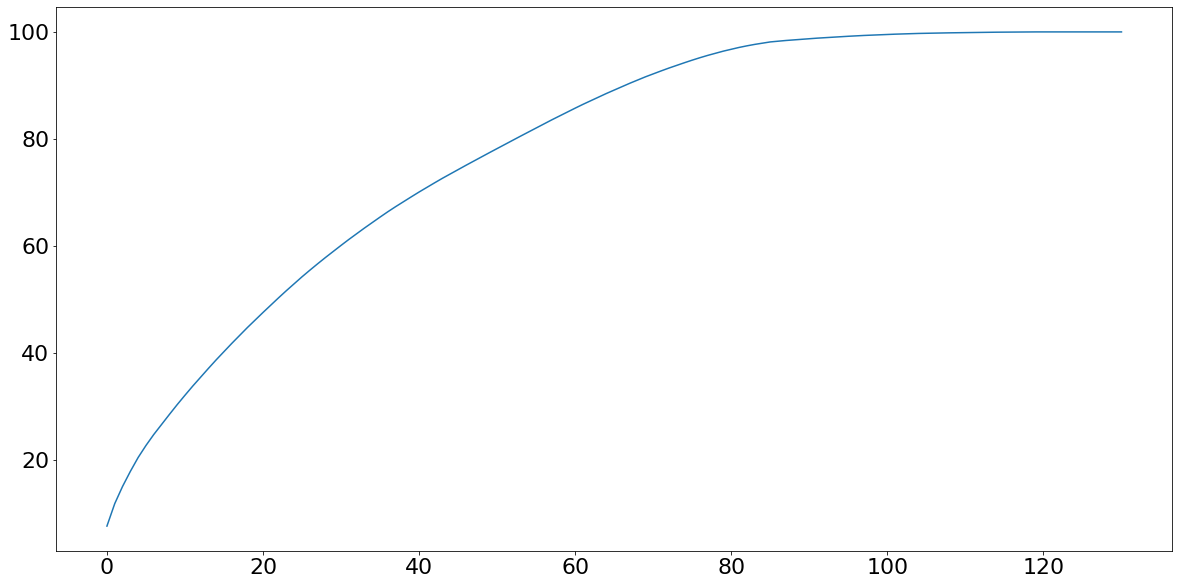

In [25]:
plt.plot(var_report['Cumsum']);

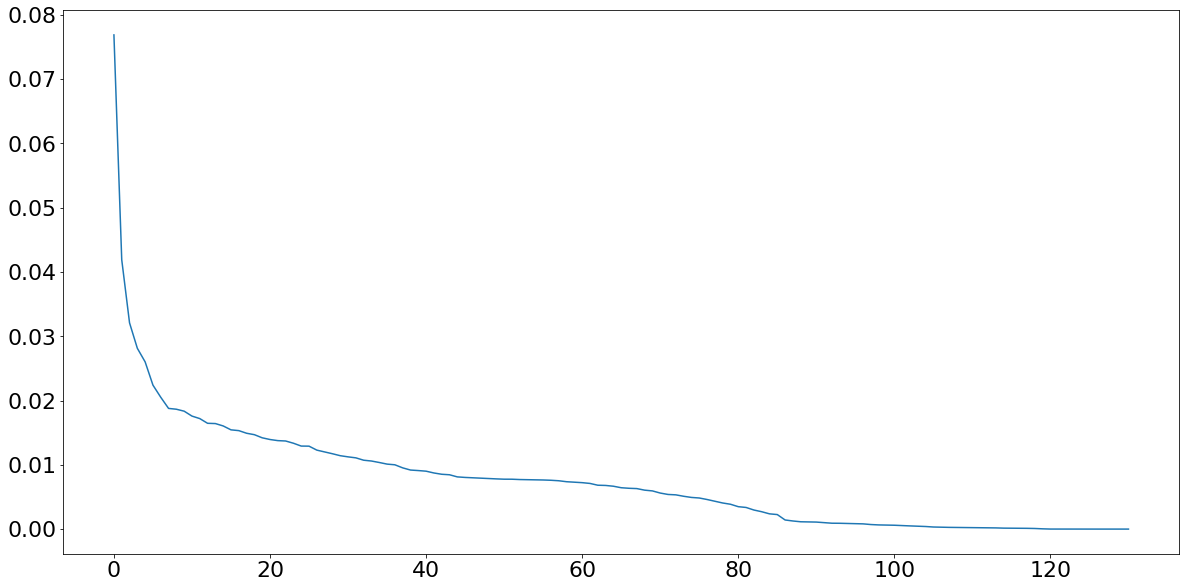

In [26]:
#scree plot rom another angle
plt.plot(pca.explained_variance_ratio_)

### Decision: The Ideal number of Components
Looking at the scree plot, at  82nd component, the respective cumulative explained variance ratio is 97.43%! 82 components from 131 features with approximate 3% loss may appear impressive, we would rather start experimenting from 68 components with a respective cumulative variance ratio of 92.18% and a loss of approximately 8%! An 8% loss for about 50% of original number of  features with a cumulative explained variance ratio 91.02% is not a bad place to start. Hence we would be able to reduce our component from 131 to 68 with a loss of approximately 8%

In [27]:
# choose the first 68 components
pca_train_forty = pca_insure_train.iloc[:,0:68]
pca_test_forty = pca_insure_test.iloc[:,0:68]


In [28]:
# verify the shape of pca version of data(validation & train) for the PCA portion of data
pca_train_forty.shape, pca_test_forty.shape

((4657, 68), (1165, 68))

In [29]:
#Plot a pairplot
# since the data is huge we would take a sample for specifically ploting the pair plot
#plot_pair = insur_train.sample(1000)
#sns.pairplot(plot_pair, kind="scatter", hue="species", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))


IndexError: index 8 is out of bounds for axis 0 with size 8

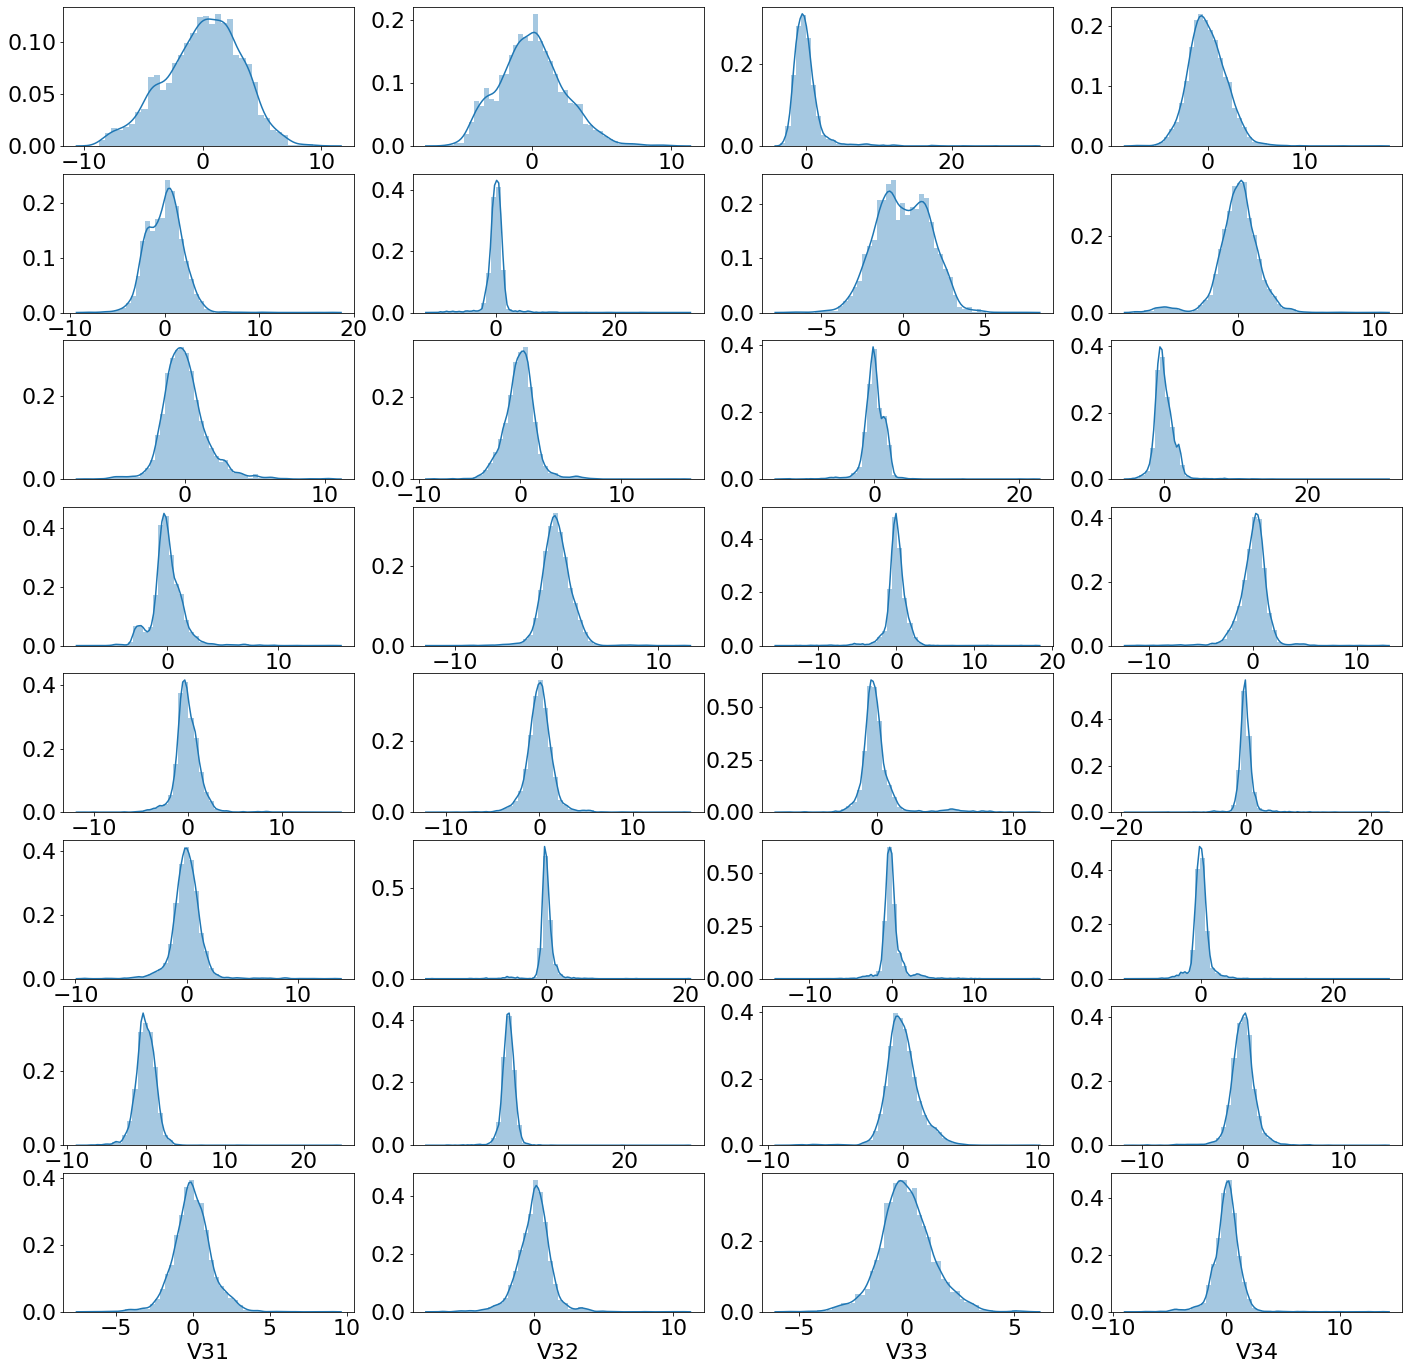

In [30]:
# Distribution of PCA train data
fig, axs = plt.subplots(8, 4, figsize=(24,24))
for ix, col in enumerate(pca_train_forty.columns):
    p0 = ix // 4
    p1 = ix % 4
    sns.distplot(pca_train_forty[col], ax = axs[p0, p1])
    axs[p0, p1].set(xlabel=col)

/Users/ajakaiye/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


IndexError: index 4 is out of bounds for axis 0 with size 4

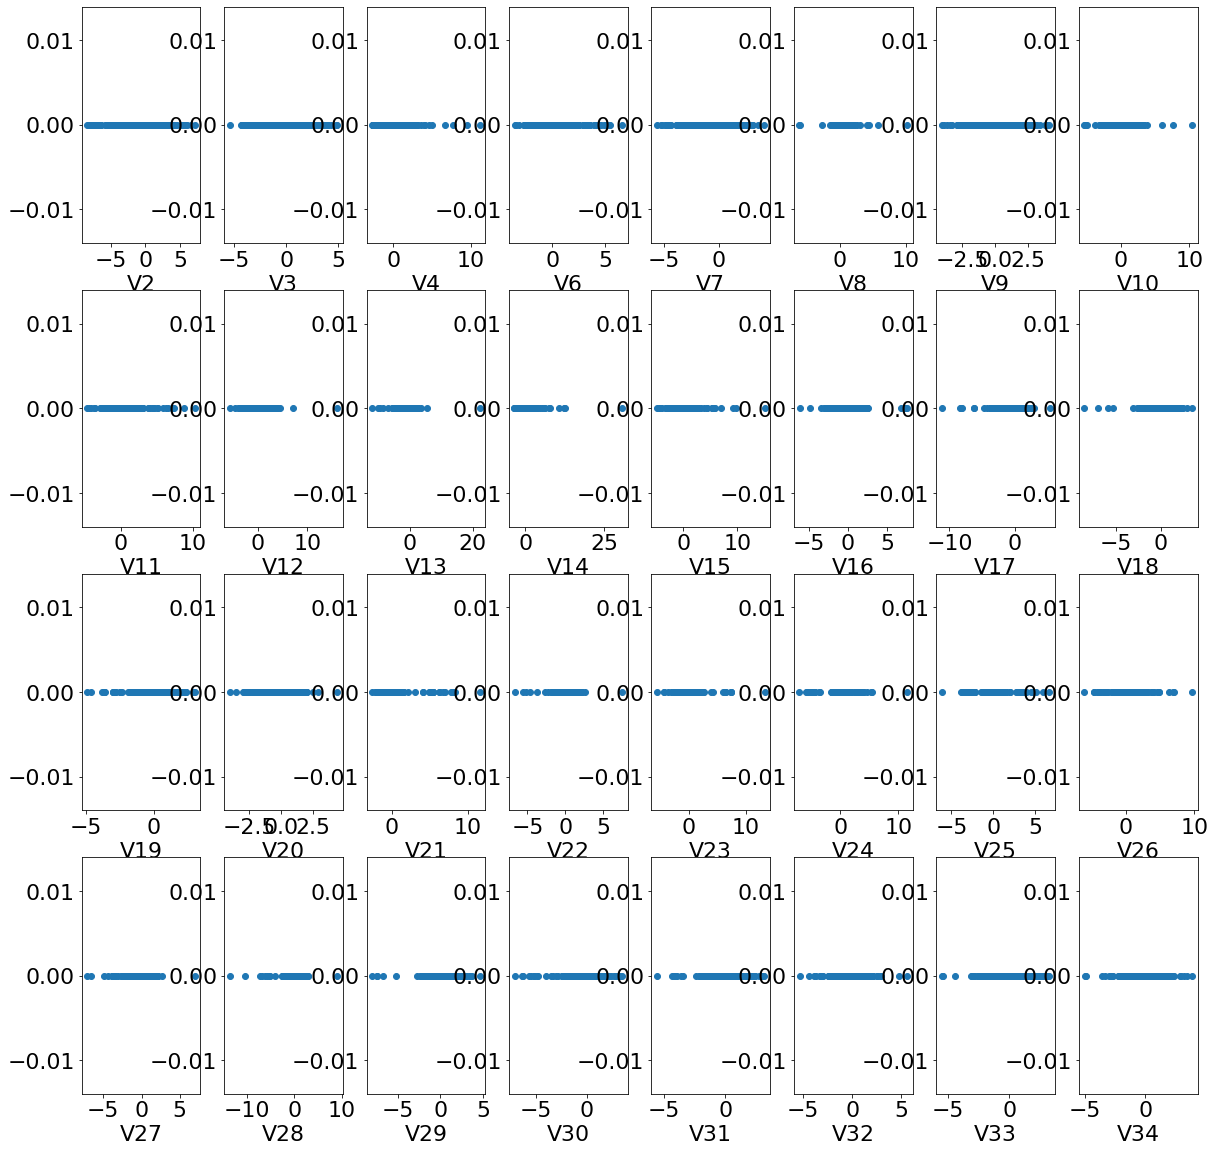

In [31]:
#Target variable relationship with other features

fig, axs = plt.subplots(4, 8, figsize=(20, 20))
for ix, feature in enumerate(pca_train_forty.columns):
    p0 = ix // 8
    p1 = ix % 8
    axs[p0, p1].scatter(pca_train_forty[feature], np.log(y_train))
    axs[p0, p1].set(xlabel=feature )


Both group of graphs which depict the distributions and the features relationship with the target variable using the PCA version of the training data aren't surprising because the concept of PCA is based on standardize data which can't but be normal and on the other hand a scatter plot between a binary target variable and other features would appear flat which is in line with the sigmoid function. However we are at least confident that our PCA version of out data is in order, this is critical information before building any model of it.

## Model
Our model process would be iterative, to this end we would subject our data to various  classification algorithms as a means of understanding which algorithm best suit our data. To this end we would start with building a simple/basic model which will form the foundation for subsequent complex ones. Our approach would be as follows:
### Basic Model
* Logistic Regression

### Out of the bag model
* Support Vector Machine(SVM) Model
* Naive Bayes Model
* KN-Neighbor
* Decision Tree
* Random forest

Consequently base on our  chosen basis of evaluation, we would choose the two models with the highest scores. We would then go ahead and tune their respective hyper-parameters with the ultimate aim to improve on their scores. 
Depending on our result we may then proceed to one of the boosting algorithms

### Baseline Model

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score, confusion_matrix, make_scorer

In [34]:
# create custom evaluation function
# def fbeta(y_true, pred_y):
#     func = fbeta_score(y_true, pred_y, beta=2)
#     return func
# fbet_score = make_scorer(fbeta)
fbeta2 = make_scorer(fbeta_score, beta=2)
strf = StratifiedKFold(n_splits=10,random_state=42, shuffle= True)

In [35]:
X = X_train_scale.as_matrix()
X_pc = X_train_scale.as_matrix()
Y = y_train.values.ravel()
X_test = scaled_insure_test.as_matrix()
model = LogisticRegression()
score = cross_val_score(model, X, Y, cv=strf, scoring=fbeta2)
print('fbeta score === Logistic Regression', score.mean())


fbeta score === Logistic Regression 0.018143102145395724


In [36]:
model.fit(X_train_scale,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
#predict on validation set
logrpred = model.predict(X_test)

In [38]:
#score quite abysmally poor baes on my standard
fbeta_score(y_test, logrpred, beta=2)

0.015197568389057748

### Out-of_bag Models with Imbalance Class
we would build the five models with the two version of our data

In [39]:
X_scaled = X_train_scale.as_matrix()
X_pca =  pca_train_forty.as_matrix()

X_scaled_test = scaled_insure_test.as_matrix()
X_pca_test = pca_test_forty.as_matrix()

In [40]:
X_variant = [X_scaled, X_pca]
X_names = ['X scaled only data', 'X with PCA']

for train_x,x_name in zip(X_variant, X_names):
    print('Data:', x_name)
    svc = SVC()
    svc_scores = cross_val_score(svc, train_x, Y, cv=strf, scoring=fbeta2)
    print('Mean Fbeta 2 score - SVC', svc_scores.mean())
    
    decision_tree = DecisionTreeClassifier()
    decision_tree_score = cross_val_score(decision_tree, train_x, Y, cv=strf, scoring=fbeta2)
    print('Mean Fbeta 2 score - Decision Tree:', decision_tree_score.mean())
    
    random_forest = RandomForestClassifier()
    random_forest_score = cross_val_score(random_forest, train_x, Y, cv=strf, scoring=fbeta2)
    print('Mean Fbeta 2 scores - Random Forest!', random_forest_score.mean())
    
    naiv_bayes = GaussianNB()
    naive_score = cross_val_score(naiv_bayes, train_x, Y, cv=strf, scoring=fbeta2)
    print('Mean Fbeta 2 score - Naive Bayes:', naive_score.mean())
    
    knn = KNeighborsClassifier()
    knn_score = cross_val_score(knn, train_x, Y, cv=strf, scoring=fbeta2)
    print('Mean Fbeta 2 score - KNN:',knn_score.mean() )
    
    print('\n')

Data: X scaled only data
Mean Fbeta 2 score - SVC 0.0
Mean Fbeta 2 score - Decision Tree: 0.15273522539208256
Mean Fbeta 2 scores - Random Forest! 0.04814977314321097
Mean Fbeta 2 score - Naive Bayes: 0.2403569527964517
Mean Fbeta 2 score - KNN: 0.022414169202012797


Data: X with PCA
Mean Fbeta 2 score - SVC 0.0
Mean Fbeta 2 score - Decision Tree: 0.12641714169930557
Mean Fbeta 2 scores - Random Forest! 0.035374284167089085
Mean Fbeta 2 score - Naive Bayes: 0.22466123989564846
Mean Fbeta 2 score - KNN: 0.031760673842520834




In [41]:
naiv_bayes.fit(X_pca,Y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [42]:
nv_bay_pred = naiv_bayes.predict(X_pca_test)
nv_bay_pred

array([0, 0, 0, ..., 0, 0, 0])

In [43]:
fbeta_score(y_test, nv_bay_pred, beta=2)


0.07915567282321899

### Build Out-of-bag Model with Balance Class
Before evaluating the performance of the out-of-bag model and perform hyper-parameter tunning on the two best models,it would be instructive to know the impact of a balance class on the evaluation performance. We can only know when we correct the imbalance class and use same to build models

### Balance Imbalance Class with Synthetics Minority Oversampling Technique (SMOTE)
We decided on SMOTE because SMOTE is the popular choice in the community for better results


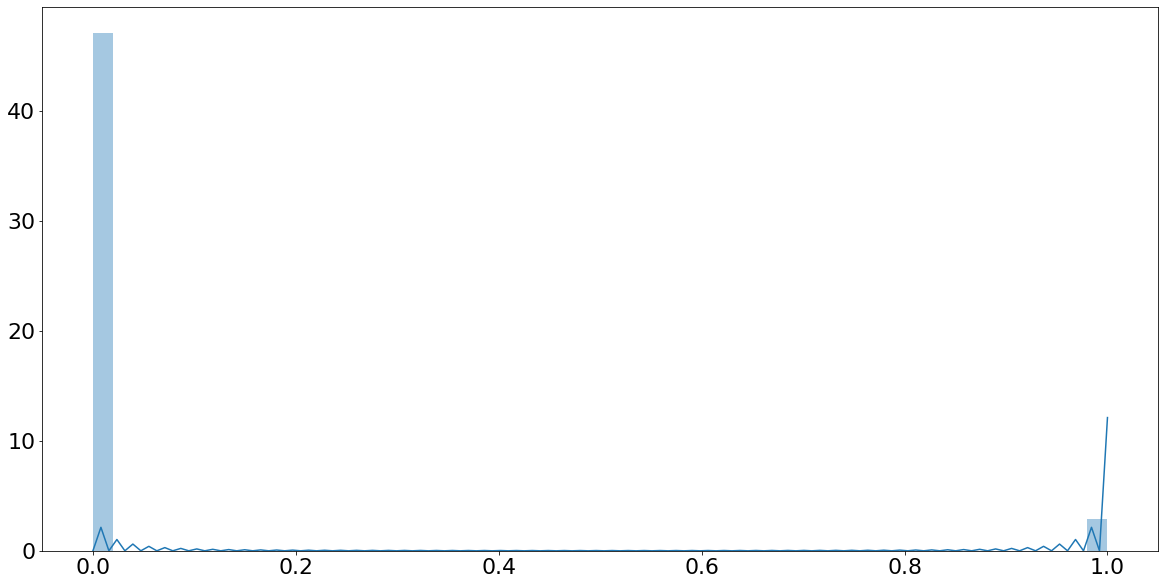

In [44]:
# clearly the class is imbalance
sns.distplot(Y);

In [45]:
# resample the sclaed portion of data set
from imblearn.over_sampling import SMOTE
method = SMOTE(kind='regular', random_state=42)
X_resample_scaled, y_resample = method.fit_sample(X_scaled,Y)


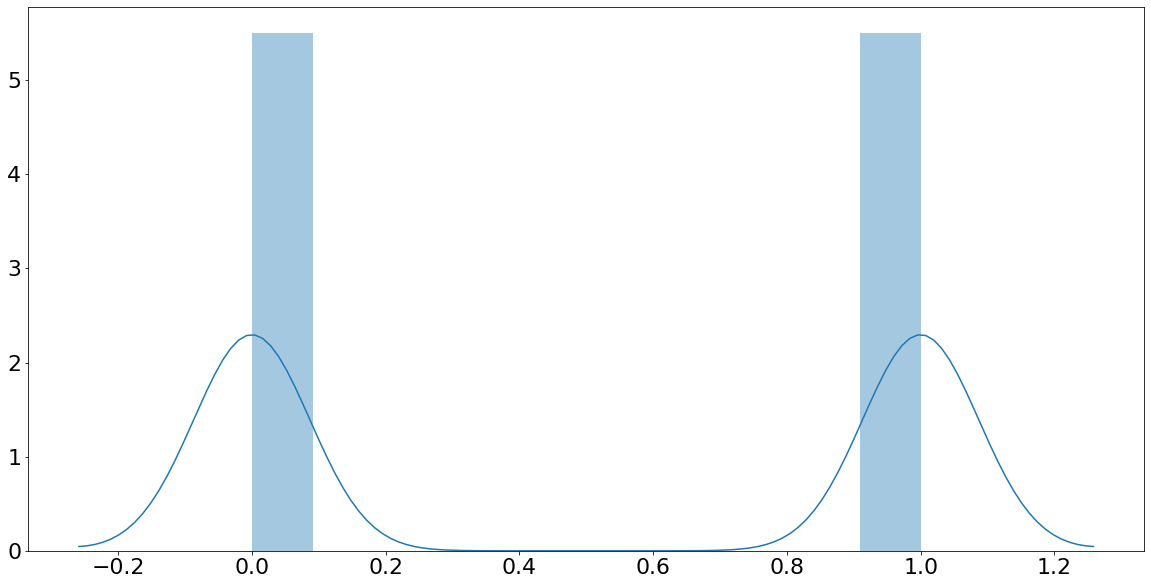

In [46]:
#class is now balance
sns.distplot(y_resample);

In [47]:
# resample PCA portion of data
X_resample_pca, y_resample = method.fit_sample(X_pca, Y)

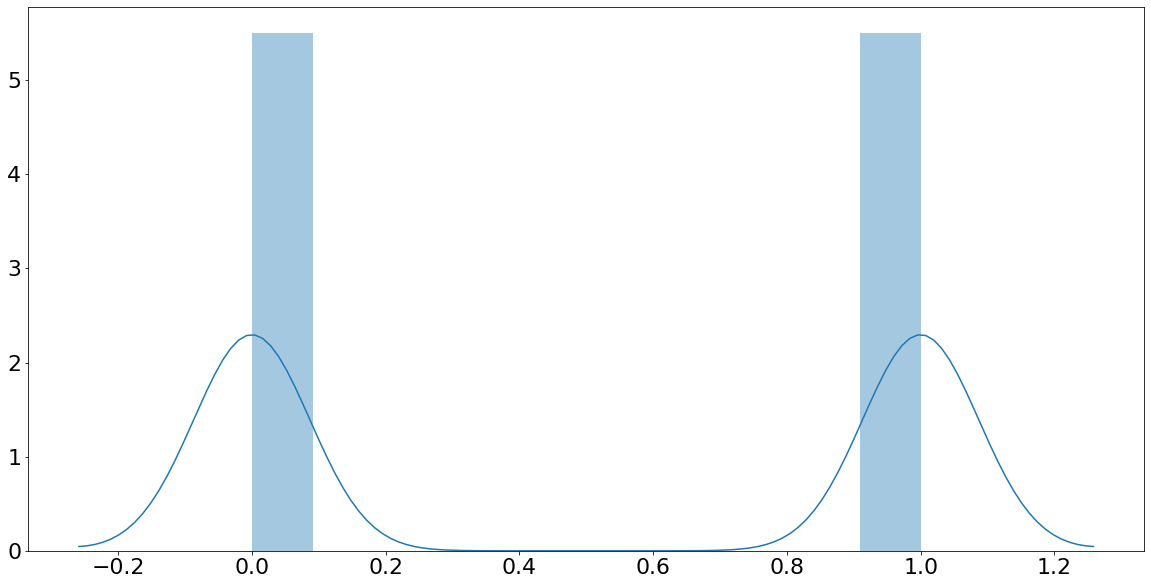

In [48]:
#balance class
sns.distplot(y_resample);

### Out-of-the-bag Model with Balance Class Data for PCA  & scaled versions of data

In [49]:
X_variant = [X_resample_scaled, X_resample_pca]
X_names = ['X scaled only with resample data', 'X PCA with resample data']

for train_x,x_name in zip(X_variant, X_names):
    print('Data:', x_name)
    svc = SVC()
    svc_scores = cross_val_score(svc, train_x, y_resample, cv=strf, scoring=fbeta2)
    print('Mean Fbeta 2 score - SVC', svc_scores.mean())
    
    decision_tree = DecisionTreeClassifier()
    decision_tree_score = cross_val_score(decision_tree, train_x, y_resample, cv=strf, scoring=fbeta2)
    print('Mean Fbeta 2 score - Decision Tree:', decision_tree_score.mean())
    
    random_forest = RandomForestClassifier()
    random_forest_score = cross_val_score(random_forest, train_x, y_resample, cv=strf, scoring=fbeta2)
    print('Mean Fbeta 2 scores - Random Forest!', random_forest_score.mean())
    
    naiv_bayes = GaussianNB()
    naive_score = cross_val_score(naiv_bayes, train_x, y_resample, cv=strf, scoring=fbeta2)
    print('Mean Fbeta 2 score - Naive Bayes:', naive_score.mean())
    
    knn = KNeighborsClassifier()
    knn_score = cross_val_score(knn, train_x, y_resample, cv=strf, scoring=fbeta2)
    print('Mean Fbeta 2 score - KNN:',knn_score.mean() )
    
    print('\n')

Data: X scaled only with resample data
Mean Fbeta 2 score - SVC 0.9609942057758282
Mean Fbeta 2 score - Decision Tree: 0.938588936940884
Mean Fbeta 2 scores - Random Forest! 0.9465356673047284
Mean Fbeta 2 score - Naive Bayes: 0.8478941822958517
Mean Fbeta 2 score - KNN: 0.9527580724088797


Data: X PCA with resample data
Mean Fbeta 2 score - SVC 0.9650840679105108
Mean Fbeta 2 score - Decision Tree: 0.9026945813243994
Mean Fbeta 2 scores - Random Forest! 0.9532721491166123
Mean Fbeta 2 score - Naive Bayes: 0.7779602583070594
Mean Fbeta 2 score - KNN: 0.9530659877077664




## Evaluation of Result
The results of using scaled versions of data and PCA(68 components) version of data under an imbalance class are quite insightful. First,Under models built using the scaled version(version of data-only standardized) of data, the F-beta scores of Decision Tree and Naive Bayes are 0.12 & 0.25 respectively whereas with PCA 68 components the F-beta scores of Decision Trees and Naive Bayes are still the highest; 0.12  & 0.23 respectively. Consequently base on performance, the Decision Tree and Naive Bayes algorithm best suit the normalized/standardized version of data when the class is extremely imbalanced. Therefore under an imbalanced class the normalized version of data is getting a higher Fbeta scores of 0.13 and 0.25 Decision Tree and Naive Bayes respectively.

On the other hand the same models of Decision Tree and Naive Bayes and as a matter of fact, generally all models, experienced a spike in  F-beta scores especially the SVC models which moved from 0.0 in both versions of data under imbalanced class to 0.9550 and 0.9591 from normalized and PCA-68 components respectively. However based on the models with the highest F-beta scores, the SVC and Random forest are standing out with an average F-beta scores of 0.95 each respectively in both version of  normalized and PCA(68 components) data under the balanced class! Consequently balance class is having a positive and significant impact on our F-beta results, so we could build our model with the balance class and either of Normalized or PCA-68 components version of data.

Based on our approach, under balance data we would select SVC and Random Forest for subsequent hyper-parameter tunning and on the other hand based on imbalanced data, we would select Decision Trees and Naive Bayes

### Fit model without hyper-parameter tunning Using the whole data set

In [72]:
model_Knn = KNeighborsClassifier()
model_Knn.fit(X_resample_pca, y_resample)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [73]:
pred_test = model_Knn.predict(X_pca_test)

In [74]:
fbeta_score(y_test, pred_test,beta=2.0)

0.26205450733752617

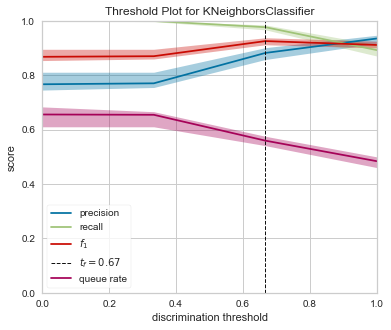

In [75]:
fig, ax = plt.subplots(figsize=(6,5))
roc_viz = DiscriminationThreshold(model_Knn)
roc_viz.fit(X_resample_pca,y_resample)
roc_viz.poof()




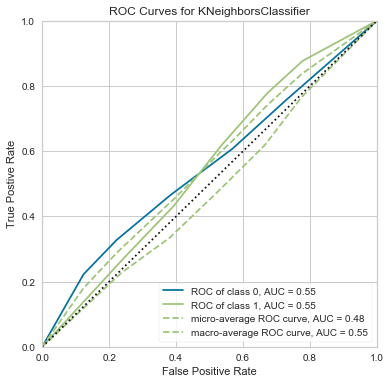

In [76]:
fig, ax = plt.subplots(figsize=(6,6))
foo = ROCAUC(model_Knn)
foo.score(X_pca_test, y_test)
foo.poof()

In [77]:
proba_pred = model_Knn.predict_proba(X_pca_test)[:,1]
proba_pred

array([0. , 0.2, 0. , ..., 0.8, 0.6, 0.4])

In [78]:
proba_pred_c = np.where(proba_pred > 0.27,1,0)
proba_pred_c

array([0, 0, 0, ..., 1, 1, 1])

In [79]:
fbeta_score(y_test, proba_pred_c, beta=2.0)

0.282258064516129

### Tune Hyper-Parameters
Tune Hyper-parameters for  KKN 

In [80]:
# KNN Hyperparameters
param_grid = {
    'n_neighbors': [3, 2, 5, 6, 10,15, 20, 25, 30, 40, 50, 54],
    'p': [2, 1, 1, 5, 3, 3.5, 4],
    'weights': ['uniform', 'distance']
}

In [81]:
#load scorer and grid search
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV
knn_model = KNeighborsClassifier()

In [82]:
def score_func(x_true, pred_y):
    que = fbeta_score(x_true, pred_y, beta=2.0)
    return que
skf = StratifiedKFold(n_splits=10,shuffle=True, random_state=42)

In [83]:
cust_score = make_scorer(score_func, greater_is_better= True)

In [84]:
Rancv = RandomizedSearchCV(estimator=knn_model, param_distributions=param_grid,cv=skf,scoring=cust_score, verbose=2 )

In [64]:
Rancv.fit(X_resample_pca, y_resample)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] weights=distance, p=3, n_neighbors=3 ............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............. weights=distance, p=3, n_neighbors=3, total=   4.7s
[CV] weights=distance, p=3, n_neighbors=3 ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s


[CV] ............. weights=distance, p=3, n_neighbors=3, total=   4.3s
[CV] weights=distance, p=3, n_neighbors=3 ............................
[CV] ............. weights=distance, p=3, n_neighbors=3, total=   3.9s
[CV] weights=distance, p=3, n_neighbors=3 ............................
[CV] ............. weights=distance, p=3, n_neighbors=3, total=   4.4s
[CV] weights=distance, p=3, n_neighbors=3 ............................
[CV] ............. weights=distance, p=3, n_neighbors=3, total=   4.4s
[CV] weights=distance, p=3, n_neighbors=3 ............................
[CV] ............. weights=distance, p=3, n_neighbors=3, total=   4.4s
[CV] weights=distance, p=3, n_neighbors=3 ............................
[CV] ............. weights=distance, p=3, n_neighbors=3, total=   4.3s
[CV] weights=distance, p=3, n_neighbors=3 ............................
[CV] ............. weights=distance, p=3, n_neighbors=3, total=   4.3s
[CV] weights=distance, p=3, n_neighbors=3 ............................
[CV] .

[CV] ............. weights=uniform, p=3, n_neighbors=40, total=  11.7s
[CV] weights=distance, p=1, n_neighbors=20 ...........................
[CV] ............ weights=distance, p=1, n_neighbors=20, total=   1.4s
[CV] weights=distance, p=1, n_neighbors=20 ...........................
[CV] ............ weights=distance, p=1, n_neighbors=20, total=   1.4s
[CV] weights=distance, p=1, n_neighbors=20 ...........................
[CV] ............ weights=distance, p=1, n_neighbors=20, total=   1.5s
[CV] weights=distance, p=1, n_neighbors=20 ...........................
[CV] ............ weights=distance, p=1, n_neighbors=20, total=   1.4s
[CV] weights=distance, p=1, n_neighbors=20 ...........................
[CV] ............ weights=distance, p=1, n_neighbors=20, total=   1.4s
[CV] weights=distance, p=1, n_neighbors=20 ...........................
[CV] ............ weights=distance, p=1, n_neighbors=20, total=   1.4s
[CV] weights=distance, p=1, n_neighbors=20 ...........................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  6.3min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   error_score='raise-deprecating',
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'n_neighbors': [3, 2, 5, 6, 10, 15, 20,
                                                        25, 30, 40, 50, 54],
                                        'p': [2, 1, 1, 5, 3, 3.5, 4],
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
      

In [65]:
#best hyper-parameters
Rancv.best_params_

{'weights': 'uniform', 'p': 1, 'n_neighbors': 3}

In [66]:
#the best score:
Rancv.best_score_

0.9641517032912663

In [67]:
#the model to be used
Rancv.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=1,
                     weights='uniform')

In [68]:
mody_KNN = KNeighborsClassifier(weights='uniform', p=1, n_neighbors=3)

In [69]:
mody_KNN.fit(X_resample_pca, y_resample)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=1,
                     weights='uniform')

In [70]:
sca_knn = KNeighborsClassifier(weights='uniform', p=1, n_neighbors=3)

In [85]:
sca_knn.fit(X_resample_scaled,y_resample)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=1,
                     weights='uniform')

In [87]:
sca_pred = sca_knn.predict_proba(X_scaled_test)[:,1]
sca_pred

array([0., 0., 0., ..., 0., 0., 0.])

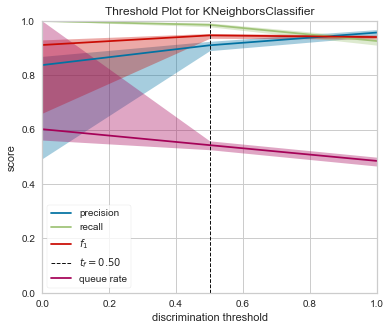

In [98]:
fig, ax = plt.subplots(figsize=(6,5))
roc_viz = DiscriminationThreshold(sca_knn)
roc_viz.fit(X_resample_scaled,y_resample)
roc_viz.poof()


In [103]:
#using 0.0 as cut off our result was quite low(0.15) but when we made the cutoff 0.27
scal_class_pred = np.where(sca_pred > 0.27,1,0)
scal_class_pred

array([0, 0, 0, ..., 0, 0, 0])

In [104]:
#perfprmance on test data using scaled version of data with KNN
fbeta_score(y_test, scal_class_pred, beta=2.0)

0.22598870056497172

In [105]:
#Getting probabilities with pca version of data
knn_pred = mody_KNN.predict_proba(X_pca_test)[:,1]
knn_pred

array([0.33333333, 0.        , 0.33333333, ..., 0.33333333, 0.66666667,
       0.        ])

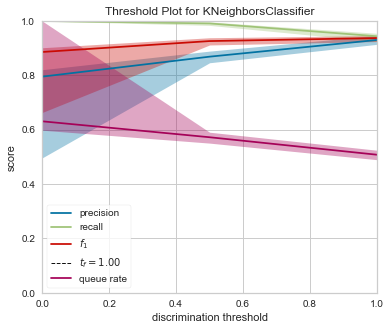

In [106]:
fig, ax = plt.subplots(figsize=(6,5))
roc_viz = DiscriminationThreshold(mody_KNN)
roc_viz.fit(X_resample_pca,y_resample)
roc_viz.poof()


In [107]:
pred_pca = np.where(knn_pred > 0.27,1,0)
pred_pca

array([1, 0, 1, ..., 1, 1, 0])

In [108]:
#performance on test data using pca version of data with KNN
fbeta_score(y_test, pred_pca, beta=2.0)

0.2693310165073849

From our above result thus far, we can distilled three scenarios: KNN model with default parameters and hyper-parameters using the pca version of data with a 0.27 cutoff had a beta score 0.28 , second scenario is KNN model with hyper-parameter tuned using the scaled version of data and a cutoff of 0.27 had a F-beta score of 0.22 and third scenario is KNN model with a tuned Hyper-parameter using the pca version of data had a F-beta score of 0.26. Consequently applying the PCA version of data set to build a KNN model produces the highest F-beta score of 0.28 followed closely with a KNN model that the Hyper-parameter has been tuned applying the pca version of the data produce an F-beta score of 0.26 Thus KNN model performs better under a data that has undergone the process of Principal Component Analysis and this is not surprising because some of the benefit of PCA process is handling the noise attributed to course of dimensionality and reducing the level of multicollinearity. Also we can observed that these results can be traced to using a SMOTE technique to re-sample our  imbalance class. The result is an improvement but there is still some element of over-fitting which we shall try fixing using other models

### Tune Hyper-Parameter
we shall tune the hyper-parameters of Random Forest since it one of the model with a high Fbeta score from our out-of-the box model

In [110]:
# build a Random forest model with default parameters and Hyper-parameters.
#with scaled version of data
random_forest.fit(X_resample_scaled, y_resample)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [111]:
#get probabilities with validation data
ran_sca_proba_pred = random_forest.predict_proba(X_scaled_test)[:,1]
ran_sca_proba_pred

array([0.4, 0.1, 0.6, ..., 0.5, 0.6, 0.5])

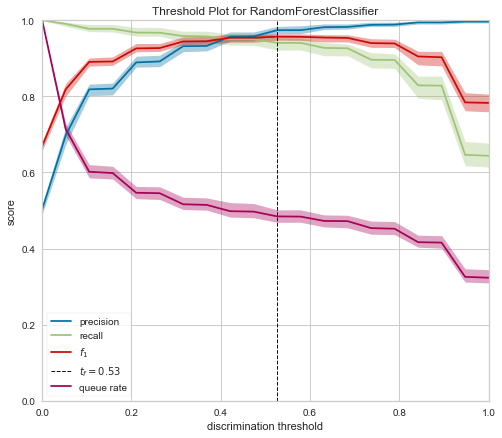

In [112]:
#check ideal cut off with discrimination threshold
fig, ax = plt.subplots(figsize=(8,7))
roc_viz = DiscriminationThreshold(random_forest)
roc_viz.fit(X_resample_scaled,y_resample)
roc_viz.poof()


In [114]:
#apply cut off to probabilities scores
predy_scal_val = np.where(ran_sca_proba_pred > 0.53,1,0)
predy_scal_val

array([0, 0, 1, ..., 0, 1, 0])

In [115]:
#check F-beta score for performance

fbeta_score(y_test,predy_scal_val,beta=2.0)

0.2492046659597031

In [116]:
# check Random Forest with pc version of data
random_forest.fit(X_resample_pca, y_resample)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [117]:
rf_pca_pred_proba = random_forest.predict_proba(X_pca_test)[:,1] 
rf_pca_pred_proba

array([0.3, 0.3, 0.2, ..., 0.4, 0.5, 0.4])

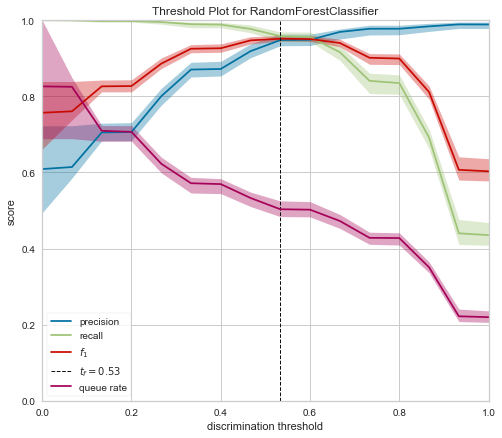

In [118]:
# check ideal cut off
fig, ax = plt.subplots(figsize=(8,7))
roc_viz = DiscriminationThreshold(random_forest)
roc_viz.fit(X_resample_pca,y_resample)
roc_viz.poof()


In [119]:
#transform prob to clases with 0.53 cutoff

ran_class_pred = np.where(rf_pca_pred_proba > 0.53,1,0)
ran_class_pred

array([0, 0, 0, ..., 0, 0, 0])

In [120]:
#check fbeta scores with pcs version of blanced recycled test
fbeta_score(y_test, ran_class_pred, beta=2.0)

0.01440922190201729

The result so far depicts scaled portion of data having higher F-beta score when compared with the pca version of data. Lets try to fine-tune the Hyper-Parameters of Random Forest and observed whether score would be improved

In [125]:
#use randomized search to tune Hyper-Parameter for Random Forest
rf_par_grid = {
    'n_estimators':[5,10,12,15, 20],
    'max_depth':[2, 3, 4, 5,6,7,8,9,10],
    'min_samples_split' :[2, 10,15, 20, 30, 40, 50],
    'max_features':[0.3, 0.5, 0.7, 0.9,0.10,0.11,0.12,0.15],
    'min_samples_leaf':[1, 2,4,5,8,10,15]
    
}

In [126]:
random_f_search = RandomizedSearchCV(estimator=random_forest, param_distributions=rf_par_grid, cv=skf, scoring= cust_score,verbose=2)

In [128]:
#random search with resampled pca version of data
random_f_search.fit(X_resample_pca,y_resample)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] n_estimators=20, min_samples_split=40, min_samples_leaf=10, max_features=0.3, max_depth=6 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=20, min_samples_split=40, min_samples_leaf=10, max_features=0.3, max_depth=6, total=   1.3s
[CV] n_estimators=20, min_samples_split=40, min_samples_leaf=10, max_features=0.3, max_depth=6 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  n_estimators=20, min_samples_split=40, min_samples_leaf=10, max_features=0.3, max_depth=6, total=   1.2s
[CV] n_estimators=20, min_samples_split=40, min_samples_leaf=10, max_features=0.3, max_depth=6 
[CV]  n_estimators=20, min_samples_split=40, min_samples_leaf=10, max_features=0.3, max_depth=6, total=   1.2s
[CV] n_estimators=20, min_samples_split=40, min_samples_leaf=10, max_features=0.3, max_depth=6 
[CV]  n_estimators=20, min_samples_split=40, min_samples_leaf=10, max_features=0.3, max_depth=6, total=   1.2s
[CV] n_estimators=20, min_samples_split=40, min_samples_leaf=10, max_features=0.3, max_depth=6 
[CV]  n_estimators=20, min_samples_split=40, min_samples_leaf=10, max_features=0.3, max_depth=6, total=   1.2s
[CV] n_estimators=20, min_samples_split=40, min_samples_leaf=10, max_features=0.3, max_depth=6 
[CV]  n_estimators=20, min_samples_split=40, min_samples_leaf=10, max_features=0.3, max_depth=6, total=   1.2s
[CV] n_estimators=20, min_samples_split=40, min_samples_leaf=

[CV]  n_estimators=10, min_samples_split=15, min_samples_leaf=1, max_features=0.11, max_depth=7, total=   0.3s
[CV] n_estimators=10, min_samples_split=15, min_samples_leaf=1, max_features=0.11, max_depth=7 
[CV]  n_estimators=10, min_samples_split=15, min_samples_leaf=1, max_features=0.11, max_depth=7, total=   0.3s
[CV] n_estimators=10, min_samples_split=15, min_samples_leaf=1, max_features=0.11, max_depth=7 
[CV]  n_estimators=10, min_samples_split=15, min_samples_leaf=1, max_features=0.11, max_depth=7, total=   0.3s
[CV] n_estimators=10, min_samples_split=15, min_samples_leaf=1, max_features=0.11, max_depth=7 
[CV]  n_estimators=10, min_samples_split=15, min_samples_leaf=1, max_features=0.11, max_depth=7, total=   0.3s
[CV] n_estimators=10, min_samples_split=15, min_samples_leaf=1, max_features=0.11, max_depth=7 
[CV]  n_estimators=10, min_samples_split=15, min_samples_leaf=1, max_features=0.11, max_depth=7, total=   0.3s
[CV] n_estimators=10, min_samples_split=15, min_samples_leaf=

[CV]  n_estimators=5, min_samples_split=2, min_samples_leaf=15, max_features=0.11, max_depth=3, total=   0.1s
[CV] n_estimators=5, min_samples_split=2, min_samples_leaf=15, max_features=0.11, max_depth=3 
[CV]  n_estimators=5, min_samples_split=2, min_samples_leaf=15, max_features=0.11, max_depth=3, total=   0.1s
[CV] n_estimators=5, min_samples_split=2, min_samples_leaf=15, max_features=0.11, max_depth=3 
[CV]  n_estimators=5, min_samples_split=2, min_samples_leaf=15, max_features=0.11, max_depth=3, total=   0.1s
[CV] n_estimators=5, min_samples_split=2, min_samples_leaf=15, max_features=0.11, max_depth=3 
[CV]  n_estimators=5, min_samples_split=2, min_samples_leaf=15, max_features=0.11, max_depth=3, total=   0.1s
[CV] n_estimators=5, min_samples_split=2, min_samples_leaf=15, max_features=0.11, max_depth=3 
[CV]  n_estimators=5, min_samples_split=2, min_samples_leaf=15, max_features=0.11, max_depth=3, total=   0.1s
[CV] n_estimators=5, min_samples_split=2, min_samples_leaf=15, max_fea

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.7min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_...
                   iid='warn', n_iter=10, n_jobs=None,
                   

In [129]:
random_f_search.best_params_

{'n_estimators': 20,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 0.11,
 'max_depth': 10}

In [130]:
random_f_search.best_score_

0.9498332486897834

In [137]:
pca_best_rs = random_f_search.best_estimator_
pca_best_rs

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=0.11, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [131]:
#random search with scaled portion of data
rand_scale_search = RandomizedSearchCV(estimator=random_forest, param_distributions=rf_par_grid, cv=skf, scoring= cust_score,verbose=2)

In [132]:
rand_scale_search.fit(X_resample_scaled, y_resample)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] n_estimators=15, min_samples_split=20, min_samples_leaf=8, max_features=0.1, max_depth=6 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=15, min_samples_split=20, min_samples_leaf=8, max_features=0.1, max_depth=6, total=   0.2s
[CV] n_estimators=15, min_samples_split=20, min_samples_leaf=8, max_features=0.1, max_depth=6 
[CV]  n_estimators=15, min_samples_split=20, min_samples_leaf=8, max_features=0.1, max_depth=6, total=   0.2s
[CV] n_estimators=15, min_samples_split=20, min_samples_leaf=8, max_features=0.1, max_depth=6 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  n_estimators=15, min_samples_split=20, min_samples_leaf=8, max_features=0.1, max_depth=6, total=   0.2s
[CV] n_estimators=15, min_samples_split=20, min_samples_leaf=8, max_features=0.1, max_depth=6 
[CV]  n_estimators=15, min_samples_split=20, min_samples_leaf=8, max_features=0.1, max_depth=6, total=   0.2s
[CV] n_estimators=15, min_samples_split=20, min_samples_leaf=8, max_features=0.1, max_depth=6 
[CV]  n_estimators=15, min_samples_split=20, min_samples_leaf=8, max_features=0.1, max_depth=6, total=   0.2s
[CV] n_estimators=15, min_samples_split=20, min_samples_leaf=8, max_features=0.1, max_depth=6 
[CV]  n_estimators=15, min_samples_split=20, min_samples_leaf=8, max_features=0.1, max_depth=6, total=   0.2s
[CV] n_estimators=15, min_samples_split=20, min_samples_leaf=8, max_features=0.1, max_depth=6 
[CV]  n_estimators=15, min_samples_split=20, min_samples_leaf=8, max_features=0.1, max_depth=6, total=   0.2s
[CV] n_estimators=15, min_samples_split=20, min_samples_leaf=8, max_fe

[CV]  n_estimators=20, min_samples_split=50, min_samples_leaf=1, max_features=0.12, max_depth=3, total=   0.2s
[CV] n_estimators=20, min_samples_split=50, min_samples_leaf=1, max_features=0.12, max_depth=3 
[CV]  n_estimators=20, min_samples_split=50, min_samples_leaf=1, max_features=0.12, max_depth=3, total=   0.2s
[CV] n_estimators=20, min_samples_split=50, min_samples_leaf=1, max_features=0.12, max_depth=3 
[CV]  n_estimators=20, min_samples_split=50, min_samples_leaf=1, max_features=0.12, max_depth=3, total=   0.2s
[CV] n_estimators=20, min_samples_split=50, min_samples_leaf=1, max_features=0.12, max_depth=3 
[CV]  n_estimators=20, min_samples_split=50, min_samples_leaf=1, max_features=0.12, max_depth=3, total=   0.2s
[CV] n_estimators=20, min_samples_split=50, min_samples_leaf=1, max_features=0.12, max_depth=3 
[CV]  n_estimators=20, min_samples_split=50, min_samples_leaf=1, max_features=0.12, max_depth=3, total=   0.2s
[CV] n_estimators=20, min_samples_split=50, min_samples_leaf=

[CV]  n_estimators=5, min_samples_split=20, min_samples_leaf=4, max_features=0.11, max_depth=6, total=   0.1s
[CV] n_estimators=5, min_samples_split=20, min_samples_leaf=4, max_features=0.11, max_depth=6 
[CV]  n_estimators=5, min_samples_split=20, min_samples_leaf=4, max_features=0.11, max_depth=6, total=   0.1s
[CV] n_estimators=5, min_samples_split=20, min_samples_leaf=4, max_features=0.11, max_depth=6 
[CV]  n_estimators=5, min_samples_split=20, min_samples_leaf=4, max_features=0.11, max_depth=6, total=   0.1s
[CV] n_estimators=5, min_samples_split=20, min_samples_leaf=4, max_features=0.11, max_depth=6 
[CV]  n_estimators=5, min_samples_split=20, min_samples_leaf=4, max_features=0.11, max_depth=6, total=   0.1s
[CV] n_estimators=5, min_samples_split=20, min_samples_leaf=4, max_features=0.11, max_depth=6 
[CV]  n_estimators=5, min_samples_split=20, min_samples_leaf=4, max_features=0.11, max_depth=6, total=   0.1s
[CV] n_estimators=5, min_samples_split=20, min_samples_leaf=4, max_fea

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   37.3s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_...
                   iid='warn', n_iter=10, n_jobs=None,
                   

In [133]:
rand_scale_search.best_params_

{'n_estimators': 15,
 'min_samples_split': 10,
 'min_samples_leaf': 15,
 'max_features': 0.1,
 'max_depth': 9}

In [134]:
rand_scale_search.best_score_

0.9370241869088345

In [141]:
model_scal_search = rand_scale_search.best_estimator_
model_scal_search

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features=0.1, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

since thescores is not significant

In [138]:
pred_search_proba = pca_best_rs.predict_proba(X_pca_test)[:,1]
pred_search_proba

array([0.35020878, 0.29939341, 0.35933957, ..., 0.42476743, 0.28257346,
       0.54971385])

In [139]:
pred_clasy_rf = np.where(pred_search_proba > 0.53,1,0)
pred_clasy_rf

array([0, 0, 0, ..., 0, 0, 1])

In [146]:
#check fbeta scores
fbeta_score(y_test, pred_clasy_rf, beta=2.0)

0.038461538461538464

In [142]:
sc_pred_prob = model_scal_search.predict_proba(X_scaled_test)[:,1]
sc_pred_prob

array([0.51970583, 0.25634169, 0.52753636, ..., 0.60509149, 0.57910286,
       0.47832382])

In [144]:
cls_predy = np.where(sc_pred_prob > 0.53,1,0)
cls_predy

array([0, 0, 0, ..., 1, 1, 0])

In [145]:
fbeta_score(y_test, cls_predy,beta=2.0)

0.3061224489795919

interesting results with random forest algorithm, we can see that applying the scaled only data version produces better f-beta score compared with the pca version of the data which is somewhat consistent with our earlier result when we build the random forest model with just the default parameter amd Hyper-parameters. Thus scaled version of data with the above Random forest hyper-parameter produce the highest F-beta score of 0.30 which is an improvement from 0.28

## Boosting Model
We shall proceed to a more complex model,since our objective is higher F-beta scores. To this end we shall build an XGBOOST model

In [147]:
from xgboost.sklearn import XGBClassifier

In [148]:
xgboost_scaled = XGBClassifier()

In [149]:
xgboost_scaled.fit(X_resample_scaled, y_resample)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [151]:
xg_proba_scl = xgboost_scaled.predict_proba(X_scaled_test)[:,1]
xg_proba_scl

array([0.9738696 , 0.899922  , 0.9842592 , ..., 0.98353195, 0.9857336 ,
       0.9876478 ], dtype=float32)

In [152]:
xg_cls_predy = np.where(xg_proba_scl > 0.53, 1,0)
xg_cls_predy

array([1, 1, 1, ..., 1, 1, 1])

In [153]:
fbeta_score(y_test, xg_cls_predy, beta=2.0)

0.27199462726662194

without tuning the Hyper-parameters of XGBOOST our Fbeta score using the scaled only/standardize version of data is 0.27. Can this score be improved? The only way we can find out is through Hyper-parameter tunning

In [154]:
xg_param = {
            'max_depth': [2,3,4,5,6],
            'learning_rate': [0.01,0.05,0.1,0.3,0.5],
            'min_child_weight': [4,5,6],
            'subsample': [i/10.0 for i in range(6,10)],
            'colsample_bytree': [i/10.0 for i in range(6,10)],
            'reg_alpha':[1e-5,1e-2,0.1,1,100],
            'gamma': [i/10.0 for i in range(0,5)],
            'n_estimators': [100,300,500,700,900,1000]
            
}

In [155]:
xgb_rd_search = RandomizedSearchCV(estimator=xgboost_scaled, param_distributions=xg_param, cv=skf, scoring= cust_score,verbose=2)

In [156]:
xgb_rd_search.fit(X_resample_scaled, y_resample)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] subsample=0.9, reg_alpha=0.1, n_estimators=300, min_child_weight=6, max_depth=4, learning_rate=0.3, gamma=0.2, colsample_bytree=0.6 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.9, reg_alpha=0.1, n_estimators=300, min_child_weight=6, max_depth=4, learning_rate=0.3, gamma=0.2, colsample_bytree=0.6, total=   7.1s
[CV] subsample=0.9, reg_alpha=0.1, n_estimators=300, min_child_weight=6, max_depth=4, learning_rate=0.3, gamma=0.2, colsample_bytree=0.6 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.1s remaining:    0.0s


[CV]  subsample=0.9, reg_alpha=0.1, n_estimators=300, min_child_weight=6, max_depth=4, learning_rate=0.3, gamma=0.2, colsample_bytree=0.6, total=   6.8s
[CV] subsample=0.9, reg_alpha=0.1, n_estimators=300, min_child_weight=6, max_depth=4, learning_rate=0.3, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.9, reg_alpha=0.1, n_estimators=300, min_child_weight=6, max_depth=4, learning_rate=0.3, gamma=0.2, colsample_bytree=0.6, total=   6.9s
[CV] subsample=0.9, reg_alpha=0.1, n_estimators=300, min_child_weight=6, max_depth=4, learning_rate=0.3, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.9, reg_alpha=0.1, n_estimators=300, min_child_weight=6, max_depth=4, learning_rate=0.3, gamma=0.2, colsample_bytree=0.6, total=   7.2s
[CV] subsample=0.9, reg_alpha=0.1, n_estimators=300, min_child_weight=6, max_depth=4, learning_rate=0.3, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.9, reg_alpha=0.1, n_estimators=300, min_child_weight=6, max_depth=4, learning_rate=0.3, gamma=0.2, colsample_

[CV]  subsample=0.6, reg_alpha=1e-05, n_estimators=700, min_child_weight=4, max_depth=5, learning_rate=0.05, gamma=0.1, colsample_bytree=0.8, total=  27.3s
[CV] subsample=0.8, reg_alpha=1e-05, n_estimators=300, min_child_weight=6, max_depth=5, learning_rate=0.3, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.8, reg_alpha=1e-05, n_estimators=300, min_child_weight=6, max_depth=5, learning_rate=0.3, gamma=0.3, colsample_bytree=0.7, total=   9.7s
[CV] subsample=0.8, reg_alpha=1e-05, n_estimators=300, min_child_weight=6, max_depth=5, learning_rate=0.3, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.8, reg_alpha=1e-05, n_estimators=300, min_child_weight=6, max_depth=5, learning_rate=0.3, gamma=0.3, colsample_bytree=0.7, total=   9.7s
[CV] subsample=0.8, reg_alpha=1e-05, n_estimators=300, min_child_weight=6, max_depth=5, learning_rate=0.3, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.8, reg_alpha=1e-05, n_estimators=300, min_child_weight=6, max_depth=5, learning_rate=0.3, gamma=

[CV]  subsample=0.6, reg_alpha=0.01, n_estimators=300, min_child_weight=4, max_depth=3, learning_rate=0.3, gamma=0.3, colsample_bytree=0.7, total=   6.6s
[CV] subsample=0.6, reg_alpha=0.01, n_estimators=300, min_child_weight=4, max_depth=3, learning_rate=0.3, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.6, reg_alpha=0.01, n_estimators=300, min_child_weight=4, max_depth=3, learning_rate=0.3, gamma=0.3, colsample_bytree=0.7, total=   6.6s
[CV] subsample=0.6, reg_alpha=0.01, n_estimators=300, min_child_weight=4, max_depth=3, learning_rate=0.3, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.6, reg_alpha=0.01, n_estimators=300, min_child_weight=4, max_depth=3, learning_rate=0.3, gamma=0.3, colsample_bytree=0.7, total=   6.5s
[CV] subsample=0.8, reg_alpha=0.01, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.8, reg_alpha=0.01, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.1, gamma=0.4, col

[CV]  subsample=0.8, reg_alpha=1, n_estimators=1000, min_child_weight=6, max_depth=2, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6, total=  12.9s
[CV] subsample=0.8, reg_alpha=1, n_estimators=1000, min_child_weight=6, max_depth=2, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.8, reg_alpha=1, n_estimators=1000, min_child_weight=6, max_depth=2, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6, total=  13.0s
[CV] subsample=0.8, reg_alpha=1, n_estimators=1000, min_child_weight=6, max_depth=2, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.8, reg_alpha=1, n_estimators=1000, min_child_weight=6, max_depth=2, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6, total=  12.8s
[CV] subsample=0.8, reg_alpha=1, n_estimators=1000, min_child_weight=6, max_depth=2, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.8, reg_alpha=1, n_estimators=1000, min_child_weight=6, max_depth=2, learning_rate=0.05, gamma=0.4, colsample_

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 21.8min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=Non...
                                                             0.9],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          0.5],
   

In [157]:
xgb_rd_search.best_params_

{'subsample': 0.6,
 'reg_alpha': 1e-05,
 'n_estimators': 700,
 'min_child_weight': 4,
 'max_depth': 5,
 'learning_rate': 0.05,
 'gamma': 0.1,
 'colsample_bytree': 0.8}

In [158]:
xgb_rd_search.best_score_

0.9525997618143275

In [161]:
xg_best = xgb_rd_search.best_estimator_
xg_best

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.1,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=4, missing=None, n_estimators=700, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=1e-05, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)

In [174]:
xg_best.fit(X_resample_scaled, y_resample)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.1,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=4, missing=None, n_estimators=700, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=1e-05, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)

In [175]:
xg_sear_proba = xg_best.predict_proba(X_scaled_test)[:,1]
xg_sear_proba

array([0.99582666, 0.98727   , 0.999818  , ..., 0.99955755, 0.99982435,
       0.9997353 ], dtype=float32)

In [178]:
xg_clas_pred = np.where(xg_sear_proba > 0.53,1,0)
xg_clas_pred

array([1, 1, 1, ..., 1, 1, 1])

In [179]:
fbeta_score(y_test, xg_clas_pred, beta=2.0)

0.27199462726662194

There is no improvement after and before hyper-parameter tuning so we would settle for standardize version of data with Random Forest tuned Hyper=parameter as above